# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

The objective of this project is to determine if machine learning algorithms can help classify individuals on a mobile network according to the probability of using mobile money and financial services. Financial Services providers  and mobile network operators can use the model’s prediction for data-driven decisions on marketing strategies like boosting and promoting  to better target their audience.


A key goal of the project is to establish whether or not demographic and socio-economic drivers exist that make it more or less likely that an individual will use mobile money and other financial services ?

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

Is it possible to use demographic and socio-economic variables to induce a model that can accurately predict the probability that an individual will use mobile money and other financial services ?

# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


I have obtained this data trough Finmark trust database.  [Finmark Trust Data Portal](https://finmark.org.za/data-portal/HTI)


FinMark Trust is an independent non-profit trust with the purpose of ‘Making financial markets work for the poor, by promoting financial inclusion and regional financial integration. We pursue our core objective of making financial markets work for the poor through two principal programmes. The first happens through the creation and analysis of financial services demand side data to provide in-depth insights on both served and unserved consumers across the developing world. The second is through systematic financial sector inclusion and deepening programmes to overcome regulatory, supplier, and other market level barriers hampering the effective provision of services.


FMT's mission of making financial markets work for the poor extends to ensuring economic inclusivity and linking financial inclusion to the real economy. This renewed focus of building inclusive financial sectors for individuals, MSME’s and small-scale farmers is robust and supported within the FMT development framework.



# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

# 1. Exploratory Data Analysis

## Objectives :
- Understand our data as well as possible 
- Develop a first modeling strategy 

## Checklist
#### Shape analysis :
- **Target** : Not in the dataset we will have to create it
- **Rows and columns** : 4269 , 35 
- **Types of variables** : Due the spss file, our dataset columns label are already encoded. 35 float columns
- **Analyis of the Nan values** :
    - 7 columns of our dataset has a Nan percentage over 40% -> Columns about money transactions made with cellphone

#### Analysis :
- **Target Creation** :
 0 :'No Access to financial services at all ' , 
 1 : 'Access to mobile money' , 
 2 :'Access to bank Financial Services not mobile money', 
 3 : 'Access to Financial services (All)' 
 To avoid multicollinearitry, we must drop the column that help us build our target variable.
  
- **Target visualization** :
    - 72% of the people surveyed do not have access to financial services (3075 / 4269)
    
    
    
- **Meaning of the variables** :
    -  standardized continuous variables, distribution non-normal, skewed, Age . we will discretized it
    - variable qualitative : binaire (0, 1),  gouvernement ID, transactions made,communication devices used , financial services used



- **Relationship Variables / Target** :
    - target / departement : Is there a difference between the people surveyed depending on where they live amd their access to financial services ? -> hypothesis to be tested
    - target/age : Are older individuals less financially included? -> 
    - Target / Income : Does the level of income have an impact on the target ?
    - Target and access to government Id
    - Target/ Communication Device

    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - Relationship betwwen ID card and departememt
    - level of education / access to communication devices

    


- **NaN analyse** :




    

## Importing the dataset

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from scipy.stats import chi2_contingency
from sklearn import preprocessing,  metrics, tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score, confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold,train_test_split 
from sklearn.svm import LinearSVC 
from sklearn.model_selection import cross_val_predict
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix,DiscriminationThreshold

## Loading the dataset

In [95]:
df1, meta = pyreadstat.read_sav('FinScope Haiti 2018 - 7 Feb 2020.sav',usecols=['departement','q09','npers','a11','a12','a13','a14aa','a14ba','a16__1',	'a16__2','a16__3'	,'a16__4'	,'a16__5','c9','e2__1',	'e2__2','e2__5','e3__1',	'e3__2',	'e3__3','e6__1','e6__3'	,'e6__5',	'e6__99','f1','f8','f9a','j2a','j5a__13','j5a__6','j5a__12','j5a__2','l1__1',	'l1__2','l2a__1','l2a__2'],user_missing=True)

In [96]:
df1.shape

(4269, 36)

In [97]:
df1.dtypes.value_counts()

float64    36
dtype: int64

### Renaming the columns of the dataset

In [98]:
df1

,departement,q09,npers,a11,a12,a13,a14aa,a14ba,a16__1,a16__2,...,f9a,j2a,j5a__12,j5a__13,j5a__2,j5a__6,l1__1,l1__2,l2a__1,l2a__2
0,9.0,1.0,5.0,1.0,43.0,5.0,1.0,2.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,9.0,1.0,7.0,2.0,28.0,3.0,7.0,2.0,1.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,9.0,1.0,3.0,2.0,16.0,1.0,4.0,2.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,9.0,1.0,5.0,1.0,27.0,1.0,6.0,2.0,1.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,1.0,2.0,2.0,26.0,1.0,5.0,1.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,11.0,2.0,6.0,2.0,34.0,2.0,4.0,2.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4265,11.0,2.0,7.0,1.0,22.0,1.0,4.0,1.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4266,11.0,2.0,3.0,1.0,20.0,1.0,5.0,2.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4267,11.0,2.0,1.0,1.0,19.0,1.0,4.0,2.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [99]:
my_dict = {}
for col in df1.columns:
    my_dict[col] = meta.column_names_to_labels[col]


In [100]:
df1.rename(columns = my_dict, inplace= True)

## Retrieving informations about the dataset

In [101]:
df1 = df1[df1.columns[(df1.isna().sum()/df1.shape[0] < 0.9)]]

In [102]:
df1.dtypes.value_counts()

float64    36
dtype: int64

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 36 columns):
 #   Column                                                                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                      --------------  -----  
 0   DEPARTMENT                                                                                                                                                                                                                  4269 non-null   float64
 1   Residence stratum                                                                                                                            

## Defining functions to perform transformation on the data 

In [104]:
def target(x) : 
    '''
    We are defining this function to build our target variable 
    @ x : Columns in the dataset that will us build our target variable 
    '''
    if x[0] + x[1] + x[2] + x[3]+ x[4] + x[5]   == 0 :
        return 0
    elif x[0] + x[1]  >=1 and x[2] + x[3] + x[4] + x[5]   == 0   :
        return 1
    elif x[0] + x[1] == 0 and x[6] >= 1 :
        return 2
    elif x[0] + x[1] >=1 and x[2] + x[3] + x[4] + x[5]  >= 1 :
        return 3   
    elif     x[2] + x[3] + x[4] + x[5] >= 1 : 
        return 2
    elif     x[2] + x[3] + x[4] + x[5]  == 0 : 
        return 0   
    else :
        return 5

ano = {0 :'No Access to financial services at all ' , 
 1 : 'Access to mobile money only' , 
 2 :'Access to formal bank Financial Services ', 
 3 : 'Access to Financial services (All)'}            
       

In [105]:
def relabel1(data  = None,columns = None) :
    '''
    This function defined here is to relabel the variable in the columns where No == 2
    '''
    for col in columns :
        data[col] = data[col].apply(lambda x : 0 if x == 2 else 1)


In [106]:
def plot_bar(data  = None , columns = None, title = None ,hue = None , labels = None ) : 
    
    sns.set_style("dark")  
    ax = sns.countplot(data = data, x = columns ,hue =hue,palette='Blues_d')
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.legend(title= title, loc='upper right', labels = labels)
    ax.set_xticklabels(['No Access to financial services at all ' , 'Access to mobile money' , 'Access to Financial Services not mobile money', 'Access to Financial services (All)'] )
    for p in ax.patches:
        percentage = '{:.2f}%'.format(p.get_height()/len(data)*100)
        x = p.get_x() + p.get_width()/2  -0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), clip_on=True, weight='bold', color='white', fontsize=14)

In [107]:
def bar1( num = None, title  = None ) : 
    p2 = df1[df1['Y'] == num]['DEPARTMENT' ].value_counts().to_frame()
    department_count = pd.merge(depart,p2, how = 'right', left_on  = depart.index,right_on  = p2.index).sort_values(by='DEPARTMENT',ascending =False)[[0,'DEPARTMENT']]
    department_count
    sns.barplot( x = 'DEPARTMENT' , y = 0 ,  data = department_count ,  palette="Blues_d")
    plt.title(title)

## Transforming the data 

In [108]:
df1['C9. What is your TOTAL PERSONAL MONTHLY INCOME'] =  df1['C9. What is your TOTAL PERSONAL MONTHLY INCOME'].apply(lambda x : 0 if (x == 98) | (x == 99)  else x)

Creating Our Target Variable 

In [109]:
df1['Y'] = df1[['L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash','L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction',  'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM','J2a. Do you currently have a bank account in your name in a bank or credit institution ? It could also be a joint/group account on which your name appears?']].apply(target,axis = 1)

In [110]:
df1['E6. For which of the following activities do you use your mobile phone?: None (single mention only)']=df1['E6. For which of the following activities do you use your mobile phone?: None (single mention only)'].fillna(1)

In [111]:
df1 = df1.fillna(0)

In [112]:
relabel1(df1, columns = ['A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a','A1.1. Enumerator: Register sex; ask only of you are uncertain','F9a During the last 12 months, have you received money from a person living abroad?',' In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?','People also receive money from time to time. During the last 12 months, have you received money from a person living within the country?','J2a. Do you currently have a bank account in your name in a bank or credit institution ? It could also be a joint/group account on which your name appears?','Residence stratum'])

In [113]:
df1['age_bins'], bins_dist = pd.qcut(df1['A1.2. How old are you?'],14,labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13], retbins= True)

In [114]:
df1['Y'].value_counts()



0    3075
1     704
2     250
3     240
Name: Y, dtype: int64

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

* Location of the people surveyed

In [115]:
p ={ 1: 'Ouest',2.0: 'Artibonite', 3.0: 'Centre', 4.0: 'GrandAnse', 5.0: 'Nippes', 6.0: 'Nord', 7.0: 'Nord-Est', 8.0: 'Nord-Ouest', 9.0: 'Reste-Ouest', 10.0: 'Sud', 11.0: 'Sud-Est'}

In [116]:
depart = pd.DataFrame.from_dict(p,orient='index')

In [117]:
from scipy.stats import shapiro
statistic,pvalue=shapiro(df1['A1.2. How old are you?'])
alpha = 0.05
print('The Shapiro Wilk Test for the whole dataset')
print(pvalue)
if pvalue > alpha:
	print('ho Distribution follows a gaussian distribution (fail to reject H0)')
else:
	print('h1 Distribution doesnt follows a gaussian distribution  (reject H0)')


The Shapiro Wilk Test for the whole dataset
8.63007544755414e-34
h1 Distribution doesnt follows a gaussian distribution  (reject H0)


* Descriptive Analysis 

C:\Users\valci\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A1.2. How old are you?'>

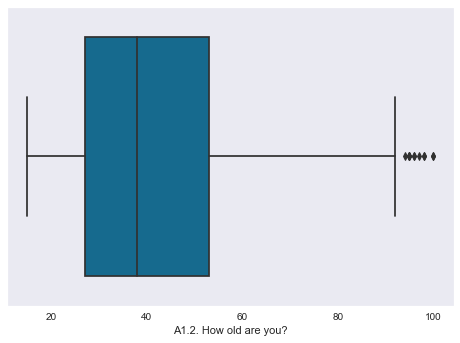

In [118]:
bins = 50
sns.boxplot(df1['A1.2. How old are you?'])#,bins = bins,kde = True)

In [119]:
df1[df1['Y'] == 0][['Number of people in household','A1.2. How old are you?']].describe()

,Number of people in household,A1.2. How old are you?
count,3075.000000,3075.000000
mean,3.711870,42.320976
std,1.942464,18.219798
min,1.000000,15.000000
25%,2.000000,28.000000
50%,3.000000,40.000000
75%,5.000000,55.000000
max,15.000000,100.000000


* People who have no access to financial services

C:\Users\valci\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A1.2. How old are you?'>

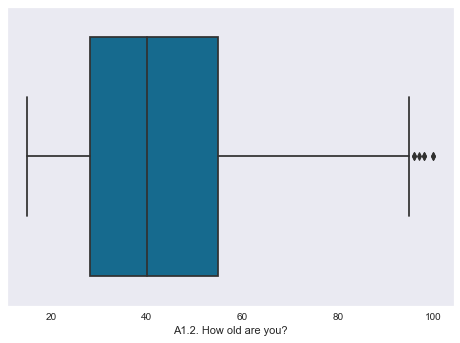

In [120]:
sns.boxplot(df1[df1['Y'] == 0]['A1.2. How old are you?'])#,bins = bins,kde = True)

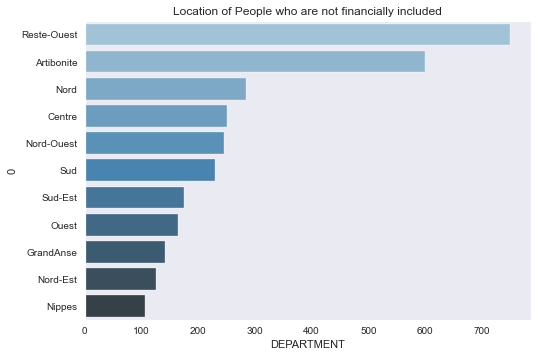

In [121]:
bar1(num = 0, title = 'Location of People who are not financially included')

* People who have access to mobile money but not financial services

In [122]:
df1[df1['Y'] == 1][['Number of people in household','A1.2. How old are you?']].describe()

,Number of people in household,A1.2. How old are you?
count,704.000000,704.000000
mean,3.911932,36.411932
std,2.129699,15.174215
min,1.000000,15.000000
25%,2.750000,25.750000
50%,3.000000,33.000000
75%,5.000000,44.000000
max,18.000000,92.000000


C:\Users\valci\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A1.2. How old are you?'>

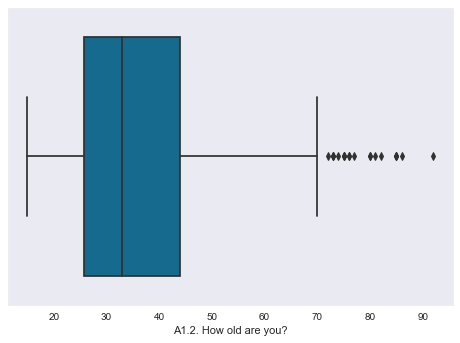

In [123]:
sns.boxplot(df1[df1['Y'] == 1]['A1.2. How old are you?'])#,bins = bins,kde = True)

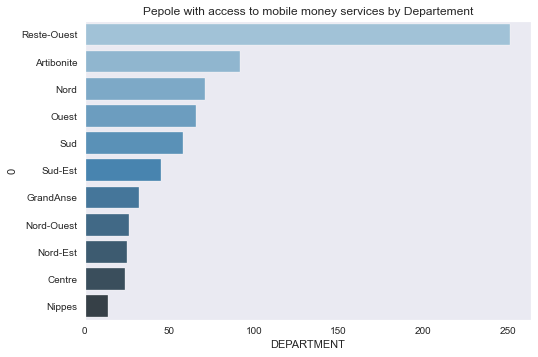

In [124]:
bar1(1, title = 'Pepole with access to mobile money services by Departement')

* People who have access to other financial services but not mobile money.

In [125]:
df1[df1['Y'] == 2][['Number of people in household','A1.2. How old are you?']].describe()

,Number of people in household,A1.2. How old are you?
count,250.000000,250.000000
mean,3.540000,41.256000
std,1.940997,13.598608
min,1.000000,15.000000
25%,2.000000,32.000000
50%,3.000000,39.000000
75%,4.000000,48.000000
max,11.000000,84.000000


C:\Users\valci\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A1.2. How old are you?'>

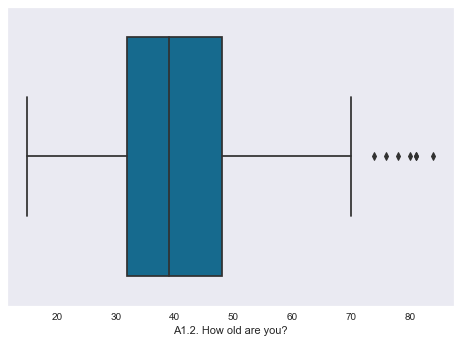

In [126]:
sns.boxplot(df1[df1['Y'] == 2]['A1.2. How old are you?'])#,bins = bins,kde = True)

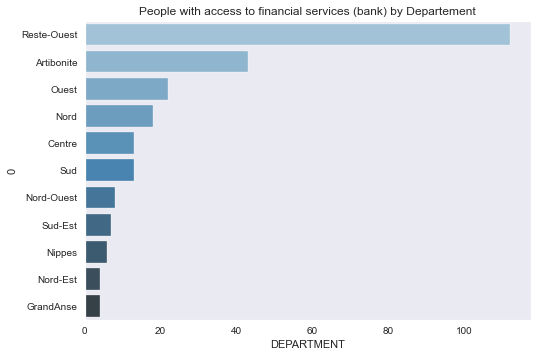

In [127]:
bar1(2, title = 'People with access to financial services (bank) by Departement')

* People who have access to financial services and mobile money at the same time . 

In [128]:
df1[df1['Y'] == 3][['Number of people in household','A1.2. How old are you?']].describe()

,Number of people in household,A1.2. How old are you?
count,240.000000,240.000000
mean,3.541667,37.595833
std,1.799097,12.906454
min,1.000000,15.000000
25%,2.000000,28.000000
50%,3.000000,36.000000
75%,5.000000,45.000000
max,11.000000,82.000000


C:\Users\valci\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A1.2. How old are you?'>

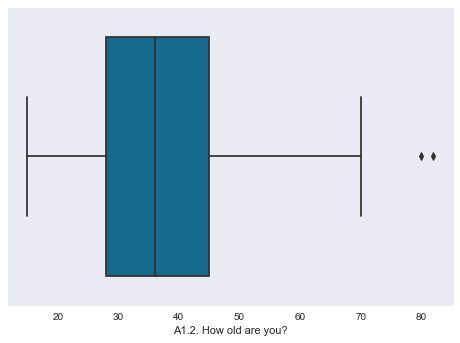

In [129]:
sns.boxplot(df1[df1['Y'] == 3]['A1.2. How old are you?'])#,bins = bins,kde = True)

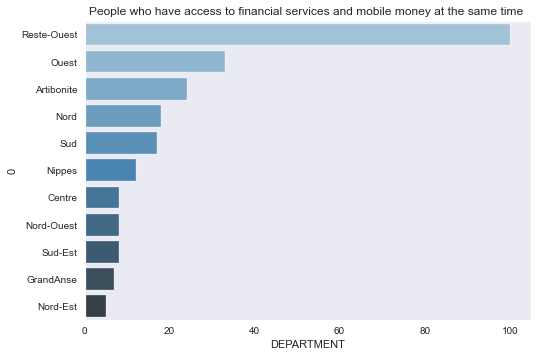

In [130]:
bar1(3, title = 'People who have access to financial services and mobile money at the same time ')

## Target / Bank Account

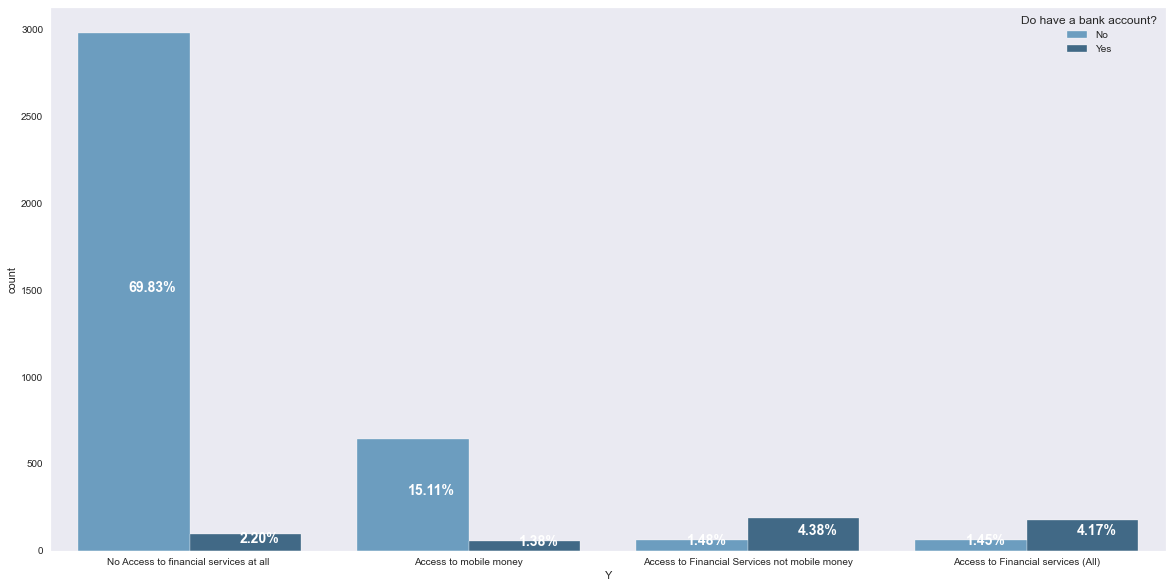

In [131]:
plot_bar(df1, columns = 'Y',  title='Do have a bank account?',hue  ='J2a. Do you currently have a bank account in your name in a bank or credit institution ? It could also be a joint/group account on which your name appears?',labels = ['No','Yes'] )

## Target / Level of Education

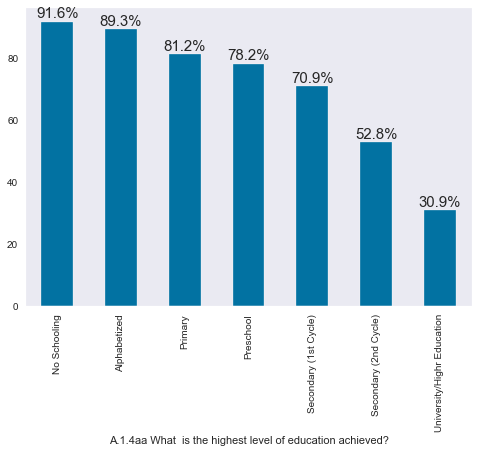

In [132]:
ax = ((df1[df1['Y']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

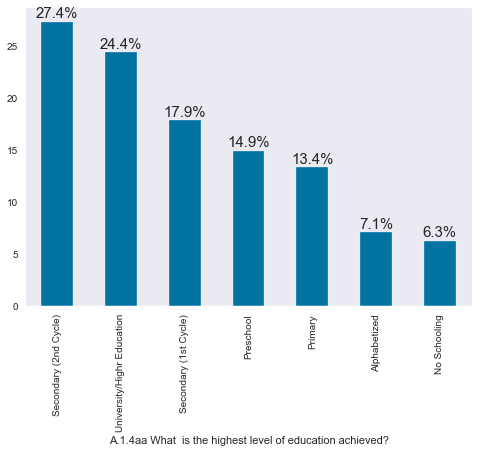

In [133]:
ax = ((df1[df1['Y']==1].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points') 

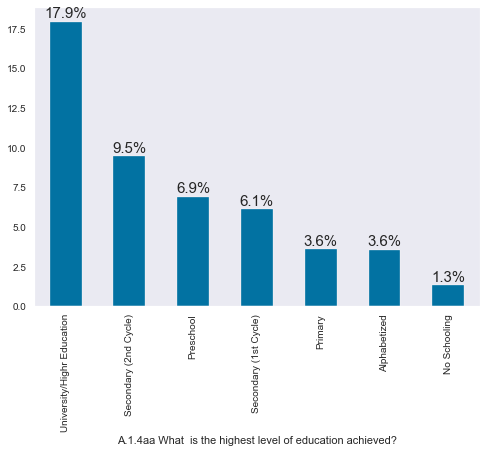

In [134]:
ax = ((df1[df1['Y']==2].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

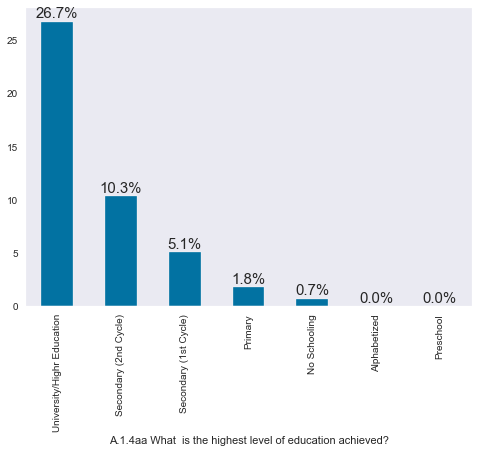

In [135]:
ax  = ((df1[df1['Y']==3].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

## Target / Departement

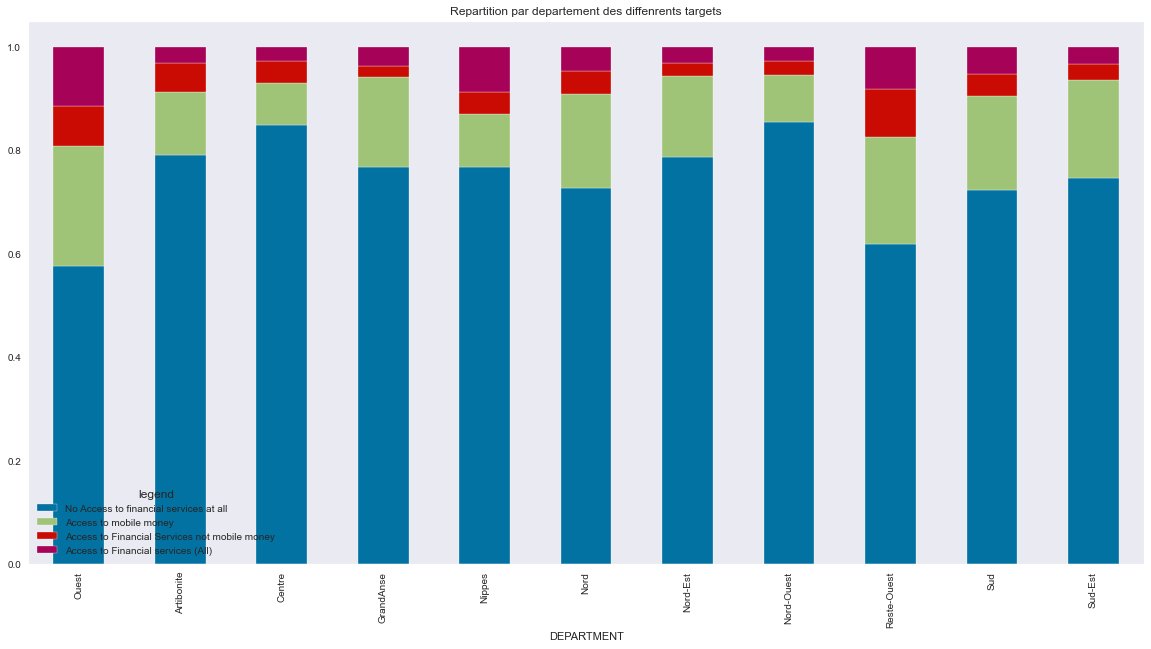

In [136]:

(df1.groupby(['DEPARTMENT', 'Y'])['Y'].count()/df1.groupby(['DEPARTMENT'])['Y'].count()).unstack().plot.bar(stacked=True).set_xticklabels(p.values())
plt.legend(title= 'legend', loc='lower left', labels =['No Access to financial services at all ' , 'Access to mobile money' , 'Access to Financial Services not mobile money', 'Access to Financial services (All)'] )
plt.title('Repartition par departement des diffenrents targets')
fig = plt.gcf()
fig.set_size_inches(20, 10)



  

In [138]:
dp_table = pd.crosstab(df1['Y'],df1['DEPARTMENT'],margins = False)
display(dp_table.rename( index = ano,columns=p))
stat, pvalue, dof, expected = chi2_contingency(dp_table)
alpha = 0.05
print("pvalue is " + str(pvalue))
if pvalue <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

DEPARTMENT,Ouest,Artibonite,Centre,GrandAnse,Nippes,Nord,Nord-Est,Nord-Ouest,Reste-Ouest,Sud,Sud-Est
Y,,,,,,,,,,,
No Access to financial services at all,165,600,251,142,106,284,126,246,749,230,176
Access to mobile money only,66,92,24,32,14,71,25,26,251,58,45
Access to formal bank Financial Services,22,43,13,4,6,18,4,8,112,13,7
Access to Financial services (All),33,24,8,7,12,18,5,8,100,17,8


pvalue is 2.130041534539709e-28
Dependent (reject H0)


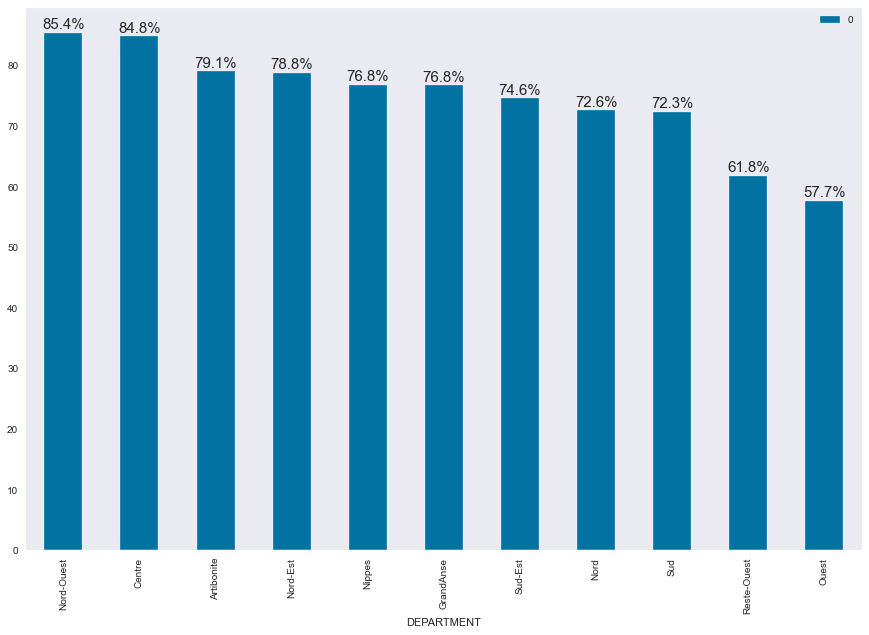

In [ ]:
ax = ((df1[df1['Y'] == 0].groupby(['DEPARTMENT', 'Y'])['Y'].count()/df1.groupby(['DEPARTMENT'])['C9. What is your TOTAL PERSONAL MONTHLY INCOME'].count())*100).sort_values(ascending = False).reset_index(level = 1).replace({'Y':ano}).rename(index={1: 'Ouest',
 2.0: 'Artibonite',
 3.0: 'Centre',
 4.0: 'GrandAnse',
 5.0: 'Nippes',
 6.0: 'Nord',
 7.0: 'Nord-Est',
 8.0: 'Nord-Ouest',
 9.0: 'Reste-Ouest',
 10.0: 'Sud',
 11.0: 'Sud-Est'}).plot.bar()
fig = plt.gcf()
fig.set_size_inches(15, 10)
 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

* In the graph and table above we can report that Nord-Ouest, Centre ,Artibonite and Nord-est are the top 4 departement in Haiti where the most people surveyed has no access to financial services
* Of all the states in the country, None of them are below 50 %. this is pretty high 

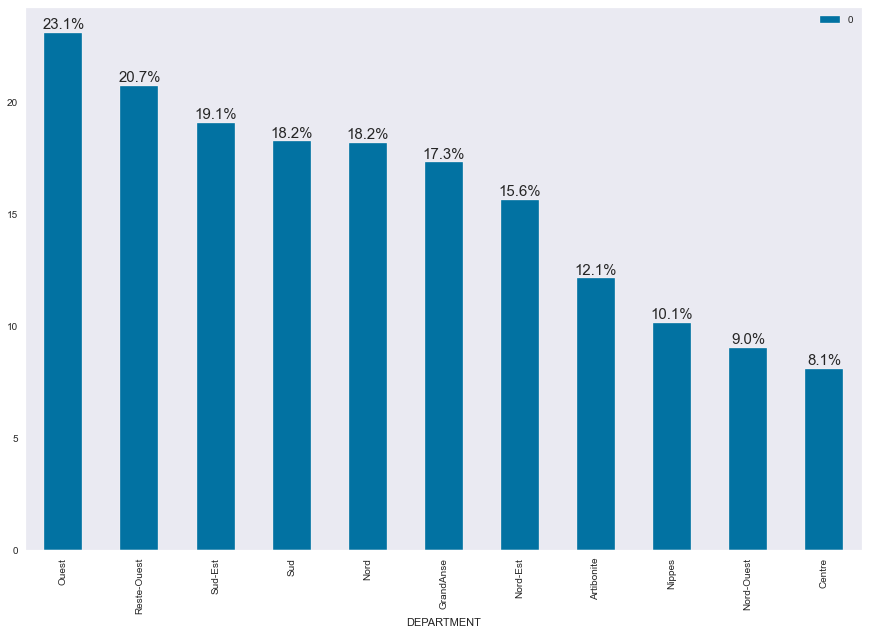

In [ ]:
ax = ((df1[df1['Y'] == 1].groupby(['DEPARTMENT', 'Y'])['Y'].count()/df1.groupby(['DEPARTMENT'])['C9. What is your TOTAL PERSONAL MONTHLY INCOME'].count())*100).sort_values(ascending = False).reset_index(level = 1).replace({'Y':ano}).rename(index={1: 'Ouest',
 2.0: 'Artibonite',
 3.0: 'Centre',
 4.0: 'GrandAnse',
 5.0: 'Nippes',
 6.0: 'Nord',
 7.0: 'Nord-Est',
 8.0: 'Nord-Ouest',
 9.0: 'Reste-Ouest',
 10.0: 'Sud',
 11.0: 'Sud-Est'}).plot.bar()
fig = plt.gcf()
fig.set_size_inches(15, 10) 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

* With no surprise, Ouest, Sud-est , Sud and Nord are the top states  with the most people that have access to mobile money but the proportion do not exceed 30 %, it is still very low.

## Gouvernement ID / Department

* Here,we want to see if the access to identification by departement follow the same as the target by departement.
    - National identity card/Voter Card

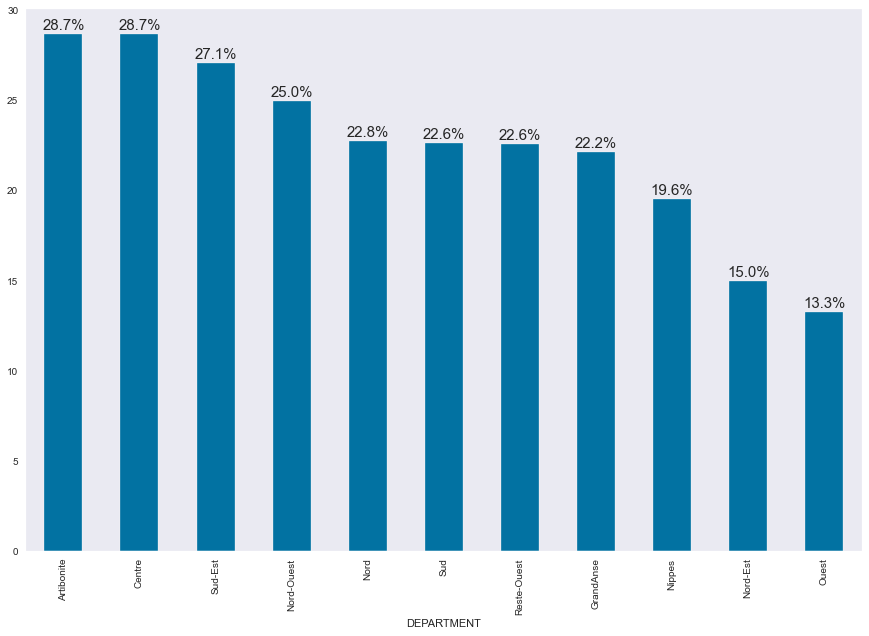

In [ ]:
ax = ((df1[df1['A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3.  National identity card/Voter Card']==0].groupby(['DEPARTMENT'])['Y'].count()*100)/(df1.groupby(['DEPARTMENT'])['Y'].count())).sort_values(ascending = False).rename(index={1: 'Ouest',
 2.0: 'Artibonite',
 3.0: 'Centre',
 4.0: 'GrandAnse',
 5.0: 'Nippes',
 6.0: 'Nord',
 7.0: 'Nord-Est',
 8.0: 'Nord-Ouest',
 9.0: 'Reste-Ouest',
 10.0: 'Sud',
 11.0: 'Sud-Est'}).plot.bar()
plt.title('') 
fig = plt.gcf()
fig.set_size_inches(15, 10) 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

This graph show that Centre,Artibonite,Nord-ouest are in the top 4 of department with more the 25% of the people dont have Gouvernement ID. Non-Acces to identification could be a barrier for individual who wants to use financial services. 

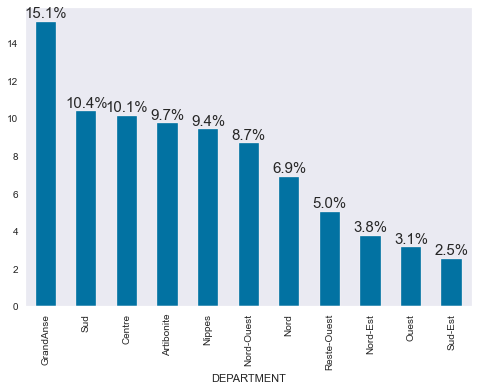

In [ ]:
ax = (df1[df1['A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate']==0].groupby(['DEPARTMENT'])['Y'].count()/(df1.groupby(['DEPARTMENT'])['Y'].count())*100).sort_values(ascending = False).rename(index={1: 'Ouest',
 2.0: 'Artibonite',
 3.0: 'Centre',
 4.0: 'GrandAnse',
 5.0: 'Nippes',
 6.0: 'Nord',
 7.0: 'Nord-Est',
 8.0: 'Nord-Ouest',
 9.0: 'Reste-Ouest',
 10.0: 'Sud',
 11.0: 'Sud-Est'}).plot.bar()

for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points') 

This graph show that GrandAnse, Sud, Centre and Artibonite are in the top 4 of department with more the 9% of the people don't have access to Birth certificate.  

## Level of education / Access to Communication Devices

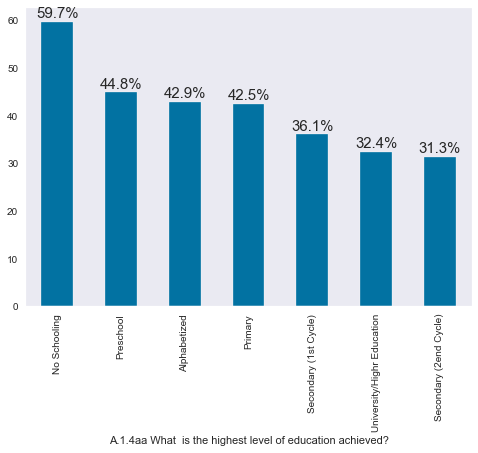

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Basic mobile phone']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2end Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points') 

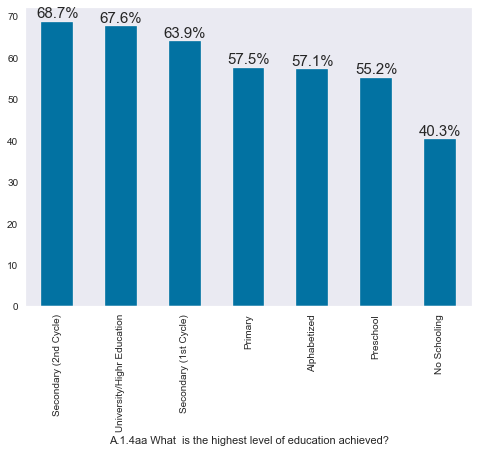

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Basic mobile phone']==1].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

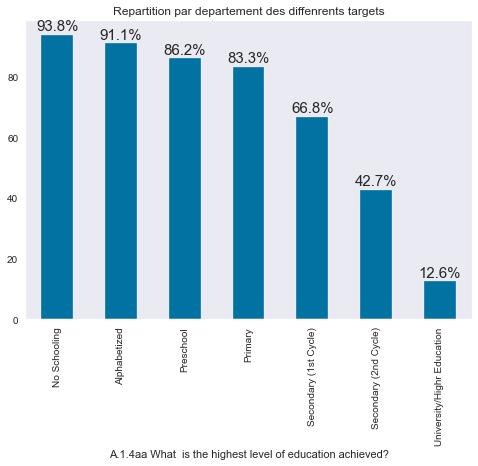

In [ ]:
plots = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Smartphone (mobile)']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()

plt.title('Repartition par departement des diffenrents targets')
for bar in plots.patches:
    plots.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

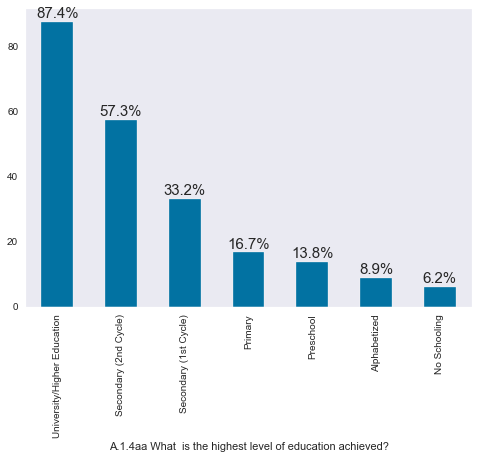

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Smartphone (mobile)']==1].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

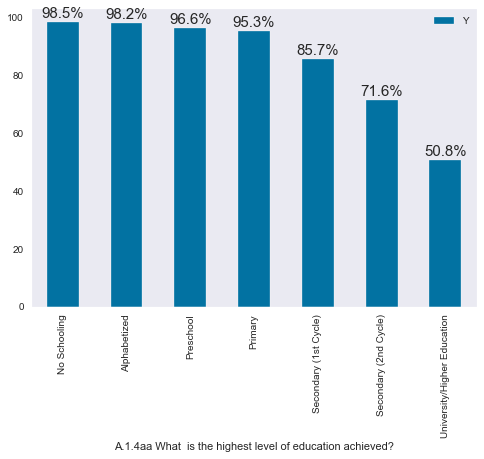

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Internet']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).to_frame().plot.bar()

for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

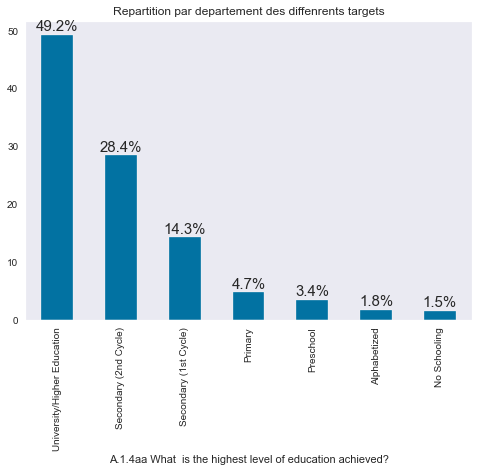

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Internet']==1].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Y'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()
plt.title('Repartition par departement des diffenrents targets')

for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points') 

# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?

## Building our model

Here we are normalizing all columns in our dataset except the target

In [ ]:
cols_to_scale = df1.columns.difference(['Y'])
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df1[cols_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns= cols_to_scale)

In [ ]:
df_scaled = pd.DataFrame(df_scaled,columns = df1.columns)


In [ ]:
df_scaled

,DEPARTMENT,Residence stratum,Number of people in household,A1.1. Enumerator: Register sex; ask only of you are uncertain,A1.2. How old are you?,A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,...,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM,L1.Have you heard about the following mobile money services ? :Lajan Cash,L1.Have you heard about the following mobile money services ? :Mon Cash,L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash,L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash,Y,age_bins
0,0.8,1.0,0.235294,1.0,0.329412,0.8,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.615385
1,0.8,1.0,0.352941,0.0,0.152941,0.4,1.000000,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.230769
2,0.8,1.0,0.117647,0.0,0.011765,0.0,0.500000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.000000
3,0.8,1.0,0.235294,1.0,0.141176,0.0,0.833333,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.230769
4,0.0,1.0,0.058824,0.0,0.129412,0.0,0.666667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,0.294118,0.0,0.223529,0.2,0.500000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.384615
4265,1.0,0.0,0.352941,1.0,0.082353,0.0,0.500000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN,0.076923
4266,1.0,0.0,0.117647,1.0,0.058824,0.0,0.666667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,0.076923
4267,1.0,0.0,0.000000,1.0,0.047059,0.0,0.500000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,0.076923


## Features Selection

Here, to avoid multicolinearity, we will drop the columns that help us build our target variable.

In [ ]:
df_scaled = df_scaled.drop(['L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash','L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction',  'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM','Y','A1.2. How old are you?','A1.2. How old are you?'], axis = 1)

In [ ]:
df1['Y']

0       0
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    1
4267    1
4268    0
Name: Y, Length: 4269, dtype: int64

In [ ]:
X = df_scaled
y = df1['Y']



In [ ]:
df_scaled

,DEPARTMENT,Residence stratum,Number of people in household,A1.1. Enumerator: Register sex; ask only of you are uncertain,A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3. National identity card/Voter Card,...,E6. For which of the following activities do you use your mobile phone?: Withdraw money from your bank account,E6. For which of the following activities do you use your mobile phone?: Send or receive money,E6. For which of the following activities do you use your mobile phone?: None (single mention only),"In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?","People also receive money from time to time. During the last 12 months, have you received money from a person living within the country?","F9a During the last 12 months, have you received money from a person living abroad?",J2a. Do you currently have a bank account in your name in a bank or credit institution ? It could also be a joint/group account on which your name appears?,L1.Have you heard about the following mobile money services ? :Lajan Cash,L1.Have you heard about the following mobile money services ? :Mon Cash,age_bins
0,0.8,1.0,0.235294,1.0,0.8,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385
1,0.8,1.0,0.352941,0.0,0.4,1.000000,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.230769
2,0.8,1.0,0.117647,0.0,0.0,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000
3,0.8,1.0,0.235294,1.0,0.0,0.833333,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.230769
4,0.0,1.0,0.058824,0.0,0.0,0.666667,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,0.294118,0.0,0.2,0.500000,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.384615
4265,1.0,0.0,0.352941,1.0,0.0,0.500000,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.076923
4266,1.0,0.0,0.117647,1.0,0.0,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076923
4267,1.0,0.0,0.000000,1.0,0.0,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.076923


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

selector = SelectKBest(f_classif, k=15)
selector.fit(X, y)
selector.scores_
features =df_scaled.columns[selector.get_support()]
X = df_scaled[features]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state=456,stratify = y)

In [ ]:
df1['Y'].value_counts(normalize=1)

0    0.720309
1    0.164910
2    0.058562
3    0.056219
Name: Y, dtype: float64

In [ ]:
y.value_counts(normalize=1)

0    0.720309
1    0.164910
2    0.058562
3    0.056219
Name: Y, dtype: float64

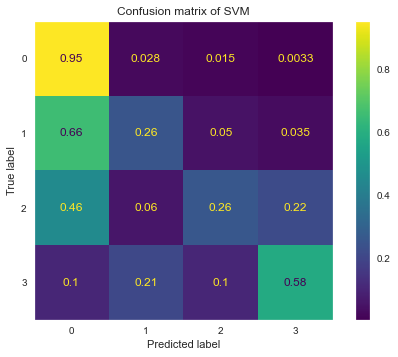

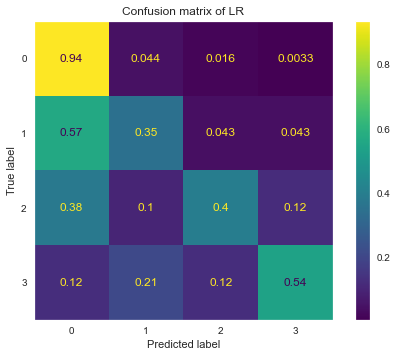

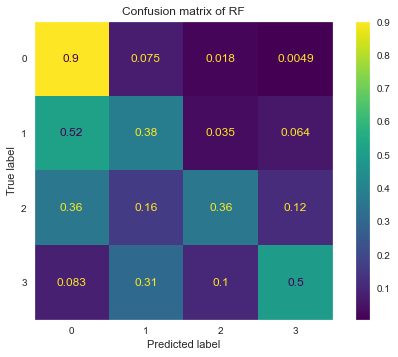

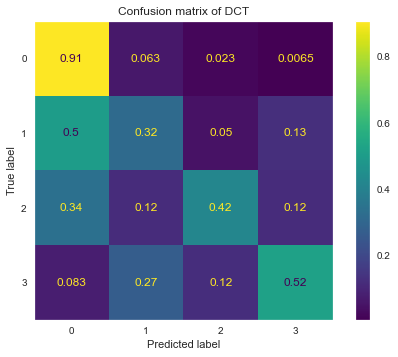

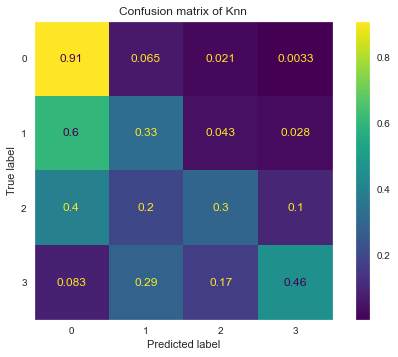

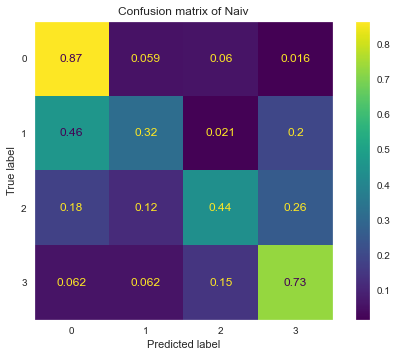

In [ ]:

svm_clf = svm.LinearSVC( max_iter= 2900,class_weight = 'balanced')
lr_clf = LogisticRegression(max_iter= 2900,class_weight = 'balanced')
rf_clf = RandomForestClassifier(random_state = 5,class_weight = 'balanced')
knn = KNeighborsClassifier(n_neighbors=7)
bayes = GaussianNB()
df_acc = pd.DataFrame()
dec_tree = tree.DecisionTreeClassifier(random_state=5,class_weight = 'balanced')
import time 
kfold = KFold(n_splits=10 ,random_state=0,shuffle = True)
moments = ['mean', 'std','time']
models_df = pd.DataFrame(index = moments)
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf,'DCT' :dec_tree, 'Knn' : knn, 'Naiv': bayes} 

for k,v in models.items():
    start = time.time()
    stats = []
    v.fit(X_train,y_train)
    end = time.time()
    cv_result = cross_val_score(v, X, y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_acc[k] = cv_result
    stats.append(cv_result.mean())
    stats.append((cv_result).std())
    stats.append(end-start)
    models_df[k] = stats
    plot_confusion_matrix(v,X_test,y_test,normalize = 'true')
    plt.title('Confusion matrix of {}'.format(k))
    
    

## oversampling same structures
## bootstraping 

What is the AUC - ROC Curve?


AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

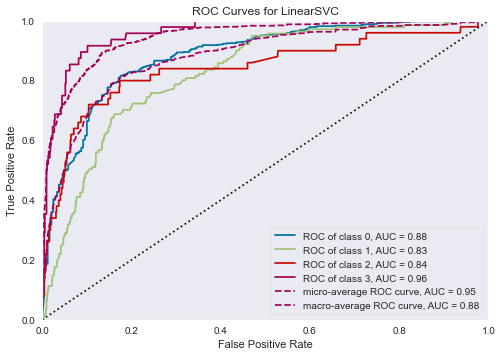

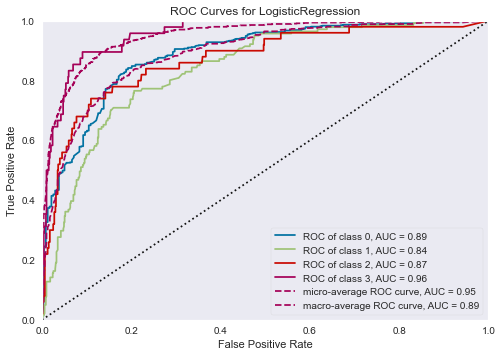

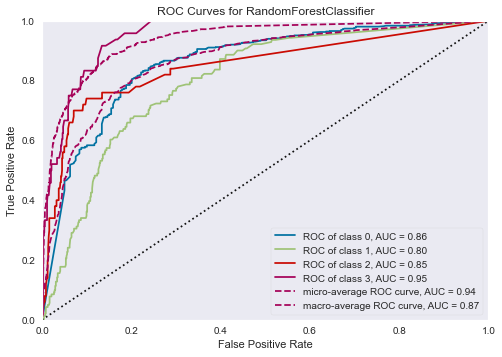

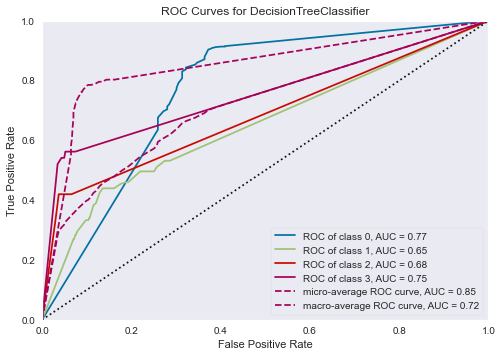

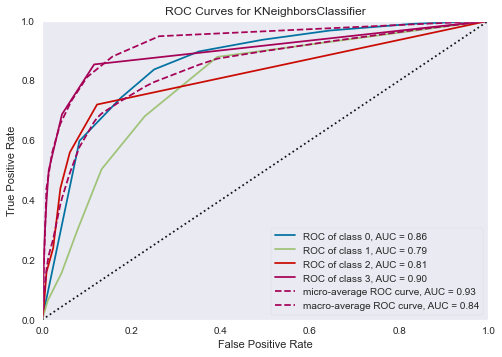

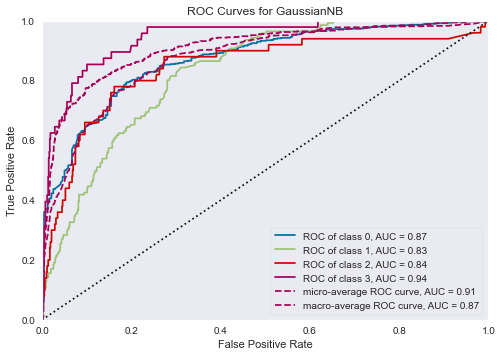

In [ ]:
for k,v in models.items ( ) : 
    visualizer = ROCAUC(v)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
    g = visualizer.show()

In [139]:
models_df

,SVM,LR,RF,DCT,Knn,Naiv
mean,79.105562,73.787534,74.982793,72.288375,78.074788,73.975437
std,1.778721,2.145383,2.388824,1.592322,1.397569,2.934808
time,0.640073,0.360041,0.928285,0.015999,0.055875,0.008140


SVM
              precision    recall  f1-score   support

           0      0.936     0.848     0.890       624
           1      0.492     0.667     0.566       135
           2      0.554     0.667     0.605        54
           3      0.561     0.561     0.561        41

    accuracy                          0.794       854
   macro avg      0.636     0.686     0.655       854
weighted avg      0.824     0.794     0.805       854

LR
              precision    recall  f1-score   support

           0      0.967     0.702     0.813       624
           1      0.382     0.741     0.504       135
           2      0.476     0.741     0.580        54
           3      0.455     0.610     0.521        41

    accuracy                          0.706       854
   macro avg      0.570     0.698     0.604       854
weighted avg      0.819     0.706     0.736       854

RF
              precision    recall  f1-score   support

           0      0.884     0.902     0.893       624
           

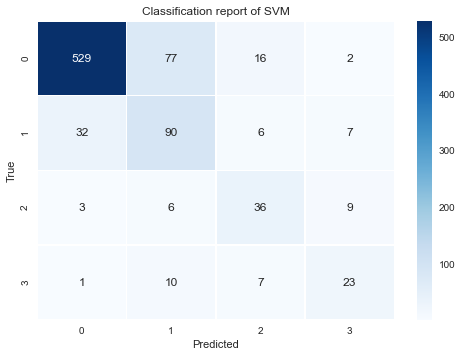

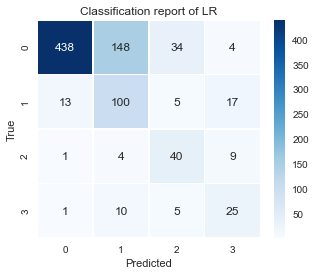

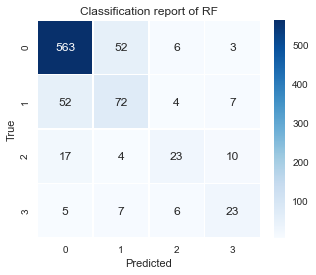

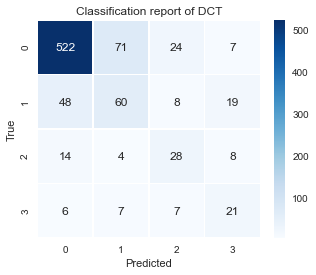

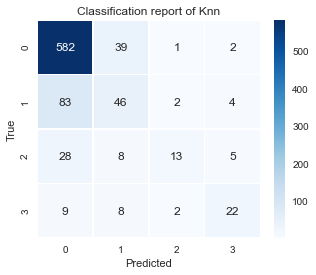

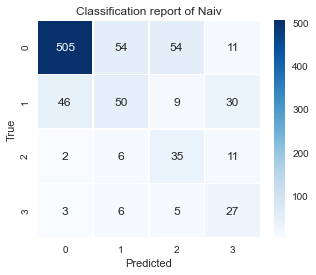

<Figure size 360x288 with 0 Axes>

In [ ]:
for k,v in models.items():
    y_predict = v.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_predict)
    ax = sns.heatmap(cf_matrix, annot=True, linewidths=.5, cmap = 'Blues', fmt="")
    ax.set(xlabel='Predicted', ylabel='True')
    plt.title('Classification report of {}'.format(k))
    plt.figure(figsize=(5,4))
    
    print(k)
    print(metrics.classification_report(y_test, y_predict, digits=3))

Using CLASS WEIGHT = balanced to improve the recall of the model
 









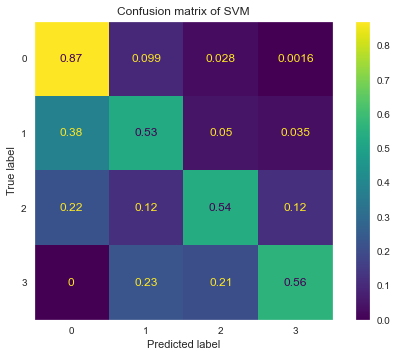

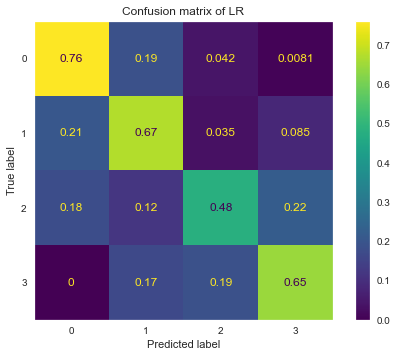

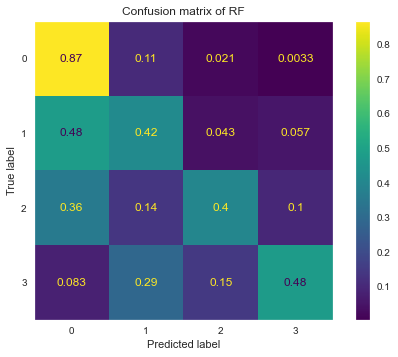

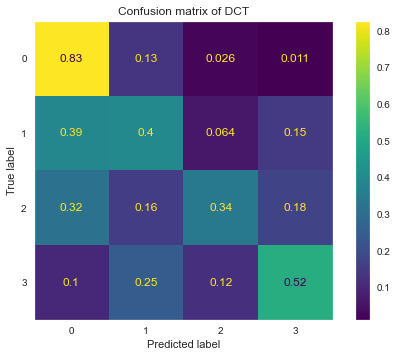

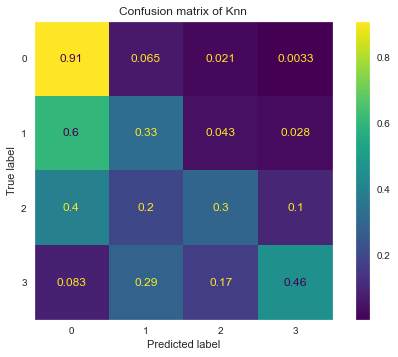

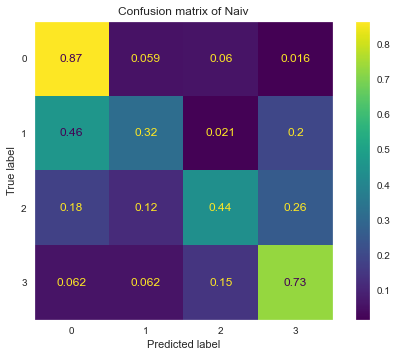

In [ ]:
svm_clf = svm.LinearSVC( max_iter= 2900,class_weight = 'balanced')
lr_clf = LogisticRegression(max_iter= 2900,class_weight = 'balanced')
rf_clf = RandomForestClassifier(random_state = 5,class_weight = 'balanced')
knn = KNeighborsClassifier(n_neighbors=7)
bayes = GaussianNB()
df_acc = pd.DataFrame()
dec_tree = tree.DecisionTreeClassifier(random_state=5,class_weight = 'balanced')
import time 
kfold = KFold(n_splits=10 ,random_state=0,shuffle = True)
moments = ['mean', 'std','time']
models_df = pd.DataFrame(index = moments)
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf,'DCT' :dec_tree, 'Knn' : knn, 'Naiv': bayes} 

for k,v in models.items():
    start = time.time()
    stats = []
    v.fit(X_train,y_train)
    end = time.time()
    cv_result = cross_val_score(v, X, y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_acc[k] = cv_result
    stats.append(cv_result.mean())
    stats.append((cv_result).std())
    stats.append(end-start)
    models_df[k] = stats
    plot_confusion_matrix(v,X_test,y_test,normalize = 'true')
    plt.title('Confusion matrix of {}'.format(k))
    
    
    